In [1]:
from numpy.random import seed
seed(888)


In [2]:
import tensorflow as tf
tf.random.set_seed(404)

In [3]:
import os 
import numpy as np
import keras

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [6]:
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

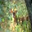

In [7]:
pic=array_to_img(x_train[10])
display(pic)

In [8]:
y_train[10][0]

4

In [10]:
label=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

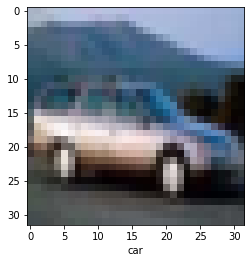

In [11]:
plt.imshow(x_train[4])
plt.xlabel(label[y_train[4][0]])
plt.show()


# Preprocess DATA

In [12]:
type(x_train[0][0][0][0])

numpy.uint8

In [13]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [14]:
type(x_train[0][0][0][0])

numpy.float64

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
image_width=32
image_height=32
image_pixels=image_width*image_height
color_channels=3
total_inputs=color_channels*image_pixels

In [17]:
x_train=x_train.reshape(x_train.shape[0],total_inputs)

In [18]:
x_train.shape

(50000, 3072)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
x_test=x_test.reshape(x_test.shape[0],total_inputs)

In [21]:
print(f'shape is {x_test.shape}')

shape is (10000, 3072)


# create validation 


In [22]:
x_val=x_train[:10000]
y_val=y_train[:10000]

In [23]:
x_val.shape

(10000, 3072)

# create training

In [24]:
x_train=x_train[10000:]
y_train=y_train[10000:]

In [25]:
x_train.shape

(40000, 3072)

# define neural network using keras

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation 

In [46]:
models_1=Sequential([
    Dense(units=128,input_dim=total_inputs,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=10,activation='softmax')
])

In [28]:
type(models_1)

tensorflow.python.keras.engine.sequential.Sequential

In [48]:
models_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# tensorboard

In [30]:
import os

In [31]:
from time import strftime

In [32]:
log_dir="tensorboard_cifar_logs/"

In [33]:
folder_name=f'models_1 at {strftime("%H %M")}'
print(folder_name)

models_1 at 11 45


In [34]:
def get_tensorboard(model_name):
    folder_name=f'model_name at {strftime("%H %M")}'
    dir_paths=os.path.join(log_dir,folder_name)
    try :
        os.makedirs(dir_paths)
    except OSError as err :
        print(err.strerror)
    else :
        print("Succefully ")
    return TensorBoard(log_dir=dir_paths)

# fit the model

In [40]:
from keras.callbacks import TensorBoard

In [41]:
small_train_size=10000
x_train_small=x_train[:small_train_size]
y_train_small=y_train[:small_train_size]


In [50]:
samples_per_batch=1000
nr_epochs=150

In [52]:
models_1.fit(x_train_small,y_train_small,batch_size=samples_per_batch,epochs=nr_epochs,validation_data=(x_val,y_val),verbose=0,callbacks=[get_tensorboard('model 1')])

Succefully 


In [54]:
from keras.layers import Dropout

In [55]:
model_2=Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
model_2.add(Dense(units=128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(units=64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(units=16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(units=10,activation='softmax',name='m2_output'))
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [57]:
model_2.fit(x_train_small,y_train_small,batch_size=samples_per_batch,epochs=nr_epochs,validation_data=(x_val,y_val),verbose=0,callbacks=[get_tensorboard('model 2')])

Succefully 


In [61]:
model_3=Sequential()
model_3.add(Dropout(0.2,seed=42,input_shape=(total_inputs,)))
model_3.add(Dense(units=128,activation='relu',name='m3_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(units=64,activation='relu',name='m3_hidden2'))
model_3.add(Dense(units=16,activation='relu',name='m3_hidden3'))
model_3.add(Dense(units=10,activation='softmax',name='m3_output'))
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
nr_epochs=100
models_1.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,validation_data=(x_val,y_val),verbose=0,callbacks=[get_tensorboard('model 1')])

Succefully 


In [64]:
nr_epochs=100
model_2.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,validation_data=(x_val,y_val),verbose=0,callbacks=[get_tensorboard('model 2')])

Succefully 


In [66]:
nr_epochs=100
model_3.fit(x_train_small,y_train_small,batch_size=samples_per_batch,epochs=nr_epochs,validation_data=(x_val,y_val),verbose=0,callbacks=[get_tensorboard('model 3')])

Succefully 


# predictioons on individual images

In [67]:
test=np.expand_dims(x_val[0],axis=0)
test.shape


(1, 3072)

In [70]:
model_2.predict(test)

array([[1.15764225e-02, 7.99996313e-04, 3.31483260e-02, 1.89643756e-01,
        6.09487407e-02, 9.85043049e-02, 5.84069550e-01, 2.08143722e-02,
        1.96020977e-04, 2.98558123e-04]], dtype=float32)

In [71]:
np.set_printoptions(precision=3)

In [73]:
model_2.predict(x_val).shape

(10000, 10)

In [74]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6], dtype=int64)

In [75]:
y_val[0]

array([6], dtype=uint8)

In [77]:
for number in range (0,10):
    print(f'predicted is : {model_2.predict_classes(np.expand_dims(x_val[number],axis=0))[0]} ')
    print(f'true is :{y_val[number]}')

predicted is : 6 
true is :[6]
predicted is : 1 
true is :[9]
predicted is : 9 
true is :[9]
predicted is : 6 
true is :[4]
predicted is : 1 
true is :[1]
predicted is : 1 
true is :[1]
predicted is : 2 
true is :[2]
predicted is : 7 
true is :[7]
predicted is : 8 
true is :[8]
predicted is : 9 
true is :[3]


# Evaluation

In [78]:
model_2.metrics_names

['loss', 'accuracy']

In [79]:
test_loss,test_accuracy=model_2.evaluate(x_test,y_test)
print(f'test loss is {test_loss} and test accucarcy is {test_accuracy}')


313/313 [==============================] - 1s 4ms/step - loss: 1.4329 - accuracy: 0.4963
test loss is 1.432912826538086 and test accucarcy is 0.49630001187324524


In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
conf_matrix=confusion_matrix(y_test,model_2.predict_classes(x_test))

In [83]:
conf_matrix.shape

(10, 10)

In [85]:
import itertools

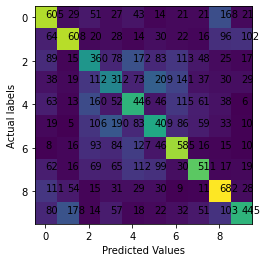

In [88]:
plt.imshow(conf_matrix)
for i,j in itertools.product(range(10),range(10)):
    plt.text(j,i,conf_matrix[i,j])
plt.ylabel("Actual labels")
plt.xlabel("Predicted Values")
plt.show()

In [90]:
recall=np.diag(conf_matrix)/np.sum(conf_matrix,axis=1)
recall

array([0.605, 0.608, 0.36 , 0.312, 0.446, 0.409, 0.585, 0.511, 0.682,
       0.445])

In [91]:
precision=np.diag(conf_matrix)/np.sum(conf_matrix,axis=0)
precision

array([0.531, 0.638, 0.36 , 0.338, 0.399, 0.414, 0.507, 0.615, 0.565,
       0.648])

In [92]:
avg_recall=np.mean(recall)
avg_precision=np.mean(precision)

In [93]:
avg_recall

0.4963000000000001

In [94]:
avg_precision

0.5014702031586185

In [95]:
f_score=2*(avg_precision * avg_recall)/(avg_precision+avg_recall)

In [96]:
f_score

0.4988717062100064